#### Goal

### Explore the Medical Insurance dataset, clean data, perform statistical analysis, and visualize insights using NumPy, Pandas, Matplotlib, and Seaborn.
### 1.Why This Project?

1. Practice data cleaning and preprocessing using Pandas.

2. Learn numerical operations with NumPy (mean, median, correlation, etc.).

3. Visualize data patterns with Matplotlib and Seaborn.

4. Understand how factors like age, sex, BMI, children, smoking, and region affect medical charges.
### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 4. Explore Data

In [4]:
print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())


Shape of dataset: (1338, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000  

### Insights:

1. Dataset contains around 1338 records and 7 columns.

2. No missing values — dataset is already clean.

3. charges is continuous, while others are categorical or numeric features.

4. Useful for regression or exploratory data analysis.

### 5. Data Cleaning

In [5]:
# Check and convert data types if necessary
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

### Insights:

1. Converted categorical columns for better memory usage and analysis.

2. Dataset ready for visualization and statistical exploration.

### 6. Analysis with NumPy & Pandas

In [6]:
# Average insurance charge
avg_charge = df['charges'].mean()

# Correlation matrix
corr = df.corr(numeric_only=True)

# Grouped averages
avg_by_smoker = df.groupby('smoker')['charges'].mean()
avg_by_region = df.groupby('region')['charges'].mean()

print("Average Charge:", avg_charge)
print("\nAverage Charges by Smoker Status:\n", avg_by_smoker)
print("\nAverage Charges by Region:\n", avg_by_region)

Average Charge: 13270.422265141257

Average Charges by Smoker Status:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average Charges by Region:
 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_6132\819531385.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_smoker = df.groupby('smoker')['charges'].mean()
C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_6132\819531385.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_region = df.groupby('region')['charges'].mean()


### Insights:

1. Smokers pay significantly higher insurance charges.

2. Regional variations are smaller but still visible.

3. Strong correlation between BMI and charges, and between age and charges.

### 7. Visualization with Matplotlib

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_6132\2059126944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar(df['smoker'].unique(), df.groupby('smoker')['charges'].mean(), color=['lightcoral', 'skyblue'])


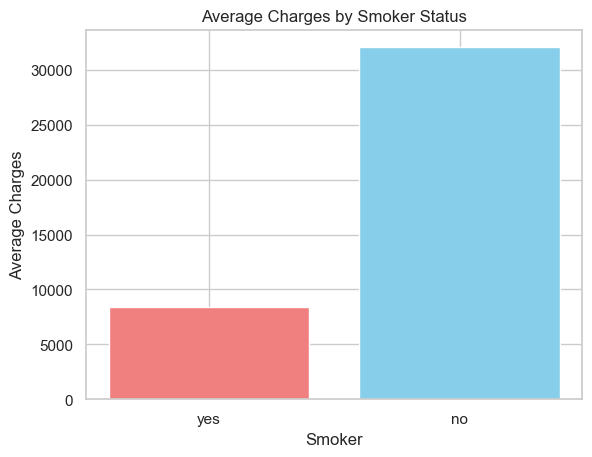

In [7]:
plt.bar(df['smoker'].unique(), df.groupby('smoker')['charges'].mean(), color=['lightcoral', 'skyblue'])
plt.title("Average Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

### Insights:

1. Smokers have much higher average medical costs.

2. Clear health-risk impact on insurance pricing.

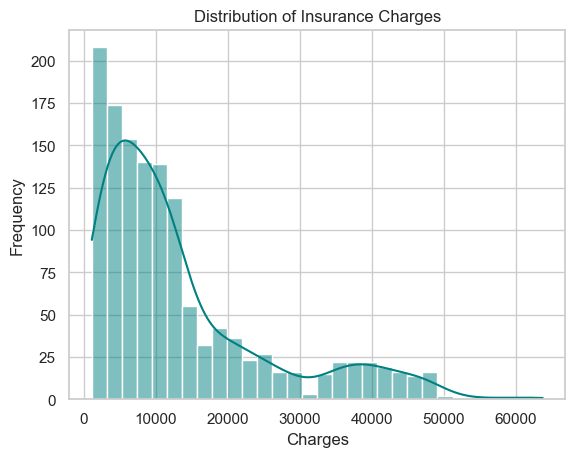

In [8]:
sns.histplot(df['charges'], bins=30, kde=True, color='teal')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

### Insights:

1. Right-skewed distribution — most people have lower charges, few have very high charges.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_6132\2870206832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


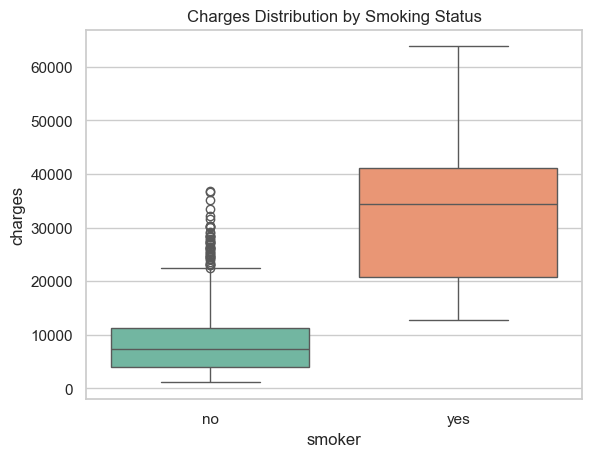

In [9]:
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title("Charges Distribution by Smoking Status")
plt.show()

### Insights:

1. Smokers’ median charges are much higher.

2. Clear difference between smokers and non-smokers.

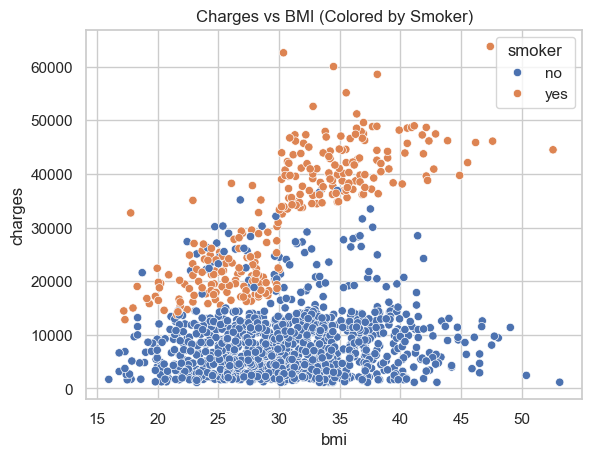

In [10]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (Colored by Smoker)")
plt.show()

### Insights:

1. Charges rise sharply with BMI for smokers.

2. Non-smokers have lower and more stable charges across BMI.

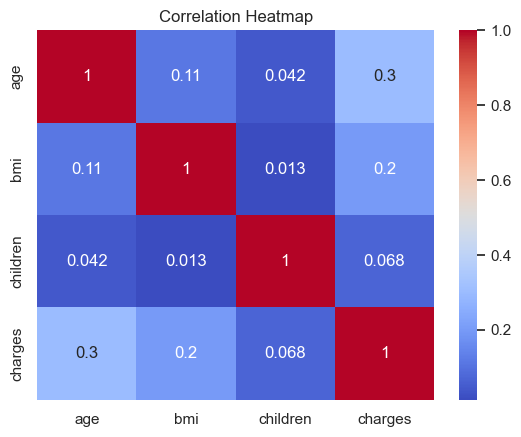

In [11]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:

1. age, bmi, and smoker status strongly influence charges.

2. children and region have minimal correlation.